## Carga del DataFrame

In [1]:
# lib para calculos matematicos y matrices
import pandas as pd
import numpy as np

In [5]:
dataframe = pd.read_csv('./data/dataframe_total.csv')
dataframe.head(5)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Activity,Activity-Label
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING


## Analisis estadistico

### Verificacion de datos faltantes

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10929 entries, 0 to 10928
Columns: 563 entries, tBodyAcc-Mean-1 to Activity-Label
dtypes: float64(561), int64(1), object(1)
memory usage: 46.9+ MB


In [7]:
dataframe.isnull().sum()

tBodyAcc-Mean-1                0
tBodyAcc-Mean-2                0
tBodyAcc-Mean-3                0
tBodyAcc-STD-1                 0
tBodyAcc-STD-2                 0
                              ..
tXAxisAcc-AngleWRTGravity-1    0
tYAxisAcc-AngleWRTGravity-1    0
tZAxisAcc-AngleWRTGravity-1    0
Activity                       0
Activity-Label                 0
Length: 563, dtype: int64

### Validacion de la cantidas de datos por actividad

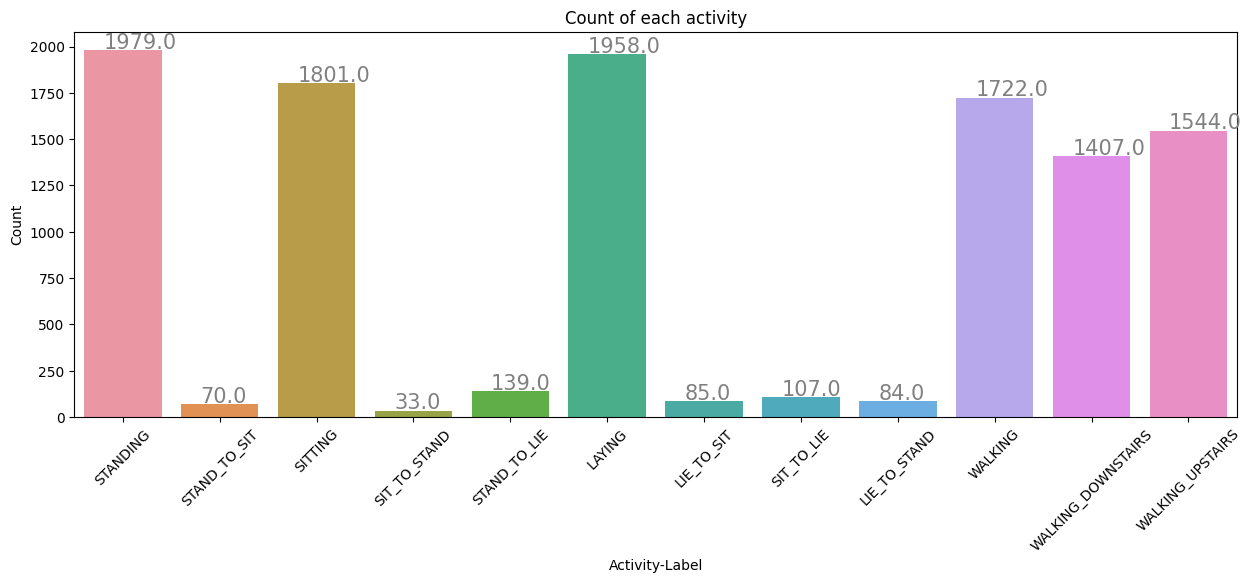

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb


plt.figure(figsize = (15, 5))
ax = sb.countplot(x = "Activity-Label", data = dataframe)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 15, color = "grey")
plt.title("Count of each activity")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

In [10]:
# Eliminacion de los registros que no tienen datos relevantes
not_relevant = ["STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"]
dataframe_reduced = dataframe[~dataframe["Activity-Label"].isin(not_relevant)]

dataframe_reduced.head(5)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Activity,Activity-Label
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,5,STANDING
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,5,STANDING
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,5,STANDING
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,5,STANDING
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,5,STANDING


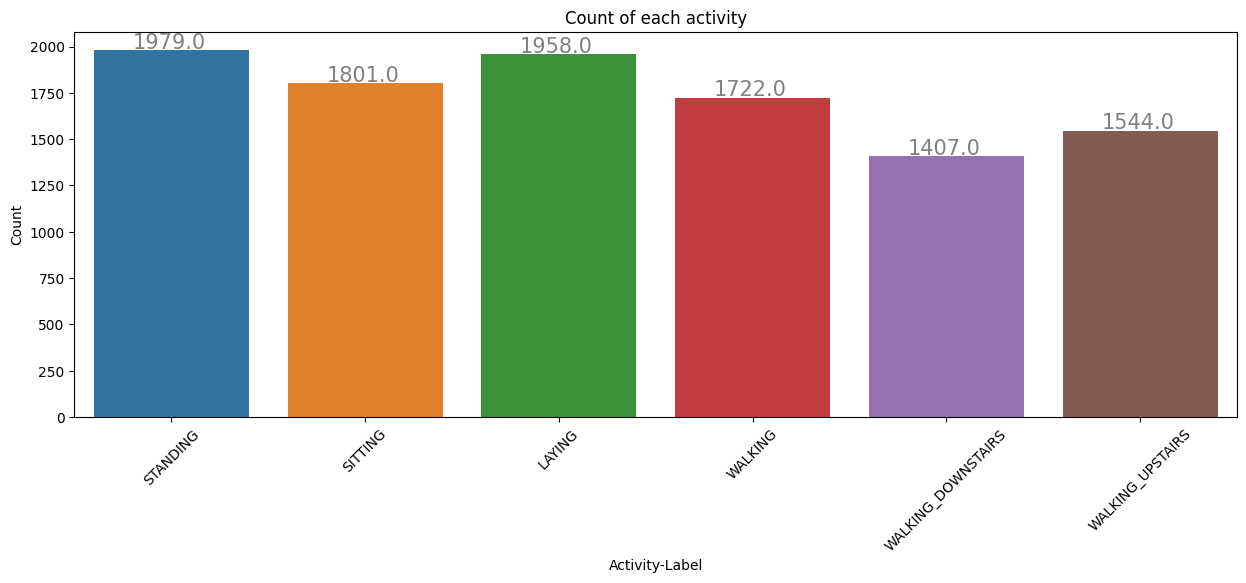

In [11]:
plt.figure(figsize = (15, 5))
ax = sb.countplot(x = "Activity-Label", data = dataframe_reduced)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 15, color = "grey")
plt.title("Count of each activity")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

### Estadisticas del dataset

In [12]:
dataframe_reduced.describe()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Activity
count,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,...,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000,10411.000000
mean,0.037818,-0.003384,-0.019830,-0.610141,-0.660661,-0.719916,-0.635783,-0.685147,-0.766821,-0.363379,...,-0.310090,-0.618479,0.008032,0.004876,0.017447,-0.010406,-0.498744,0.063919,-0.047125,3.638267
std,0.027515,0.037417,0.034330,0.437255,0.345917,0.290861,0.412024,0.320949,0.240246,0.498027,...,0.314476,0.304877,0.336060,0.444734,0.616040,0.484136,0.509397,0.305351,0.266339,1.740342
min,-0.431796,-0.961665,-0.583458,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.852385,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000
25%,0.032937,-0.010691,-0.027848,-0.992283,-0.983738,-0.984661,-0.993000,-0.984467,-0.986620,-0.795658,...,-0.545362,-0.841298,-0.123052,-0.279420,-0.494790,-0.388253,-0.818278,0.004599,-0.122024,2.000000
50%,0.038978,-0.002902,-0.019570,-0.939969,-0.877356,-0.881674,-0.946372,-0.888915,-0.900437,-0.734775,...,-0.345399,-0.703365,0.009600,0.014084,0.013708,-0.007929,-0.716659,0.182019,0.002778,4.000000
75%,0.043521,0.003668,-0.012430,-0.252639,-0.347732,-0.479606,-0.304854,-0.394718,-0.570253,0.054825,...,-0.128427,-0.490193,0.146727,0.290259,0.537801,0.359154,-0.523031,0.250852,0.108568,5.000000
max,0.329487,1.000000,0.707290,1.000000,0.388042,0.448457,1.000000,0.330257,0.210878,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


### Correlacion de las variables

In [13]:
corr_matrix = dataframe_reduced.corr(method='pearson')

def tidy_corr_matrix(corr_mat):
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','relation']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_relation'] = np.abs(corr_mat['relation'])
    corr_mat = corr_mat.sort_values('abs_relation', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix)

C:\Users\jmanu\AppData\Local\Temp\ipykernel_4508\3639814923.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe_reduced.corr(method='pearson')


,variable_1,variable_2,relation,abs_relation
300074,fBodyGyroMag-SMA-1,fBodyGyroMag-Mean-1,1.000000,1.000000
124410,tGravityAccMag-ropy-1,tBodyAccMag-ropy-1,1.000000,1.000000
126662,tGravityAccMag-ARCoeff-4,tBodyAccMag-ARCoeff-4,1.000000,1.000000
126099,tGravityAccMag-ARCoeff-3,tBodyAccMag-ARCoeff-3,1.000000,1.000000
307393,fBodyGyroJerkMag-SMA-1,fBodyGyroJerkMag-Mean-1,1.000000,1.000000
...,...,...,...,...
45101,tBodyAccJerk-Mean-1,tBodyGyro-IQR-3,-0.000005,0.000005
274,tBodyAcc-Mean-1,fBodyAcc-Max-1,0.000004,0.000004
153988,fBodyAcc-Max-1,tBodyAcc-Mean-1,0.000004,0.000004
147245,tBodyGyroJerkMag-ARCoeff-2,tBodyAcc-Mean-2,-0.000003,0.000003


### Verificacion si los datos tienen distribucion normal

In [14]:
# from scipy.stats import normaltest
from scipy.stats import shapiro


normal=[]
no_normal=[]
for current_column in dataframe_reduced.drop(["Activity", "Activity-Label"], axis=1).columns:
  stat,p = shapiro(dataframe_reduced[current_column])
  # stat,p = normaltest(dataframe_reduced[current_column])
  if np.any( p > 0.05):
    normal.append(current_column)
  else:
    no_normal.append(current_column)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",no_normal)

c:\Users\jmanu\OneDrive\Documents\Semestre\InteligentesII\venv\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Con distribucion normal:  ['tBodyAcc-ARCoeff-12', 'tBodyGyro-ARCoeff-4']
Sin distribucion normal:  ['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2', 'tBodyAcc-STD-3', 'tBodyAcc-Mad-1', 'tBodyAcc-Mad-2', 'tBodyAcc-Mad-3', 'tBodyAcc-Max-1', 'tBodyAcc-Max-2', 'tBodyAcc-Max-3', 'tBodyAcc-Min-1', 'tBodyAcc-Min-2', 'tBodyAcc-Min-3', 'tBodyAcc-SMA-1', 'tBodyAcc-Energy-1', 'tBodyAcc-Energy-2', 'tBodyAcc-Energy-3', 'tBodyAcc-IQR-1', 'tBodyAcc-IQR-2', 'tBodyAcc-IQR-3', 'tBodyAcc-ropy-1', 'tBodyAcc-ropy-1.1', 'tBodyAcc-ropy-1.2', 'tBodyAcc-ARCoeff-1', 'tBodyAcc-ARCoeff-2', 'tBodyAcc-ARCoeff-3', 'tBodyAcc-ARCoeff-4', 'tBodyAcc-ARCoeff-5', 'tBodyAcc-ARCoeff-6', 'tBodyAcc-ARCoeff-7', 'tBodyAcc-ARCoeff-8', 'tBodyAcc-ARCoeff-9', 'tBodyAcc-ARCoeff-10', 'tBodyAcc-ARCoeff-11', 'tBodyAcc-Correlation-1', 'tBodyAcc-Correlation-2', 'tBodyAcc-Correlation-3', 'tGravityAcc-Mean-1', 'tGravityAcc-Mean-2', 'tGravityAcc-Mean-3', 'tGravityAcc-STD-1', 'tGravityAcc-STD-2', '

## Algoritmo de machine learning

Partir el dataset en una porcion para entrenamiento y otra para pruebas

In [15]:
X = dataframe_reduced.drop(["Activity", "Activity-Label"], axis=1)
Y = dataframe_reduced["Activity"]

print("Dimesiones de feactures: ", X.shape, ", Dimensiones de target: ", Y.shape)

Dimesiones de feactures:  (10411, 561) , Dimensiones de target:  (10411,)


In [16]:
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=4)
print("XTRain=",X_train.shape)
print("XTest=",X_test.shape)

XTRain= (7287, 561)
XTest= (3124, 561)


### Implementacion de regresion logistica

In [17]:
#Importación de la regresión logistica
from sklearn.linear_model import LogisticRegression


modelo_regresion_logistica=LogisticRegression()
modelo_regresion_logistica.fit(X_train,Y_train)

c:\Users\jmanu\OneDrive\Documents\Semestre\InteligentesII\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Prediccion del modelo de regresion

In [18]:
Y_prediction = modelo_regresion_logistica.predict(X_test)
print(Y_prediction)
print("vs")
print(Y_test)

[6 1 1 ... 3 6 1]
vs
5650     6
283      1
8842     1
6633     4
10185    5
        ..
10901    2
1297     4
4415     3
9646     6
984      1
Name: Activity, Length: 3124, dtype: int64


### Matriz de confusion del modelo de regresion logistica

[[510   2   0   0   0   0]
 [  4 439   1   0   0   0]
 [  1   3 435   0   0   0]
 [  0   1   0 518  34   0]
 [  1   0   1  24 586   0]
 [  0   0   0   2   0 562]]


<Axes: >

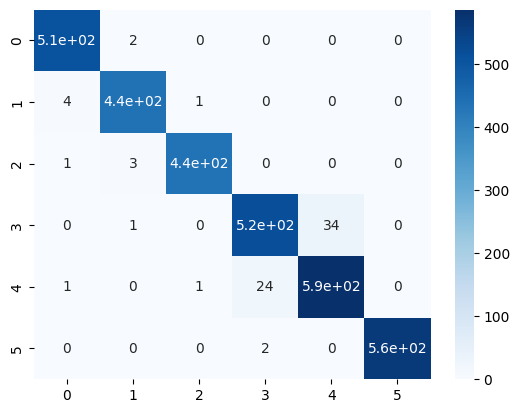

In [19]:
#Importación de matriz de confusión
from sklearn.metrics import confusion_matrix


matriz=confusion_matrix(Y_test,Y_prediction)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")

### Metricas del modelo de regresion logistica

In [20]:
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report


precision_recall_fscore_support(Y_test,Y_prediction,average=None)
etiquetas=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LYING']
print(classification_report(Y_test,Y_prediction,target_names=etiquetas))
print("Accuracy=",modelo_regresion_logistica.score(X_test,Y_test))

                    precision    recall  f1-score   support

           WALKING       0.99      1.00      0.99       512
  WALKING_UPSTAIRS       0.99      0.99      0.99       444
WALKING_DOWNSTAIRS       1.00      0.99      0.99       439
           SITTING       0.95      0.94      0.94       553
          STANDING       0.95      0.96      0.95       612
             LYING       1.00      1.00      1.00       564

          accuracy                           0.98      3124
         macro avg       0.98      0.98      0.98      3124
      weighted avg       0.98      0.98      0.98      3124

Accuracy= 0.9763124199743918
